In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("loan-train.csv")

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df_train = df_train.drop('Loan_ID', axis=1)

In [6]:
df_train.shape

(614, 12)

In [7]:
df_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df_train['Dependents'].fillna('0', inplace = True)
df_train['Married'].fillna('No', inplace = True)
df_train['Self_Employed'].fillna('No', inplace = True)

In [9]:
df_train.dropna(inplace = True)

In [10]:
df_train.shape

(517, 12)

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [12]:
df_train['Gender']= label_encoder.fit_transform(df_train['Gender'])
  
df_train['Gender'].unique()

array([1, 0])

In [13]:
df_train['Married']= label_encoder.fit_transform(df_train['Married'])
  
df_train['Married'].unique()

array([1, 0])

In [14]:
df_train['Dependents']= label_encoder.fit_transform(df_train['Dependents'])
  
df_train['Dependents'].unique()

array([1, 0, 2, 3])

In [15]:
df_train['Education']= label_encoder.fit_transform(df_train['Education'])
  
df_train['Education'].unique()

array([0, 1])

In [16]:
df_train['Self_Employed']= label_encoder.fit_transform(df_train['Self_Employed'])
  
df_train['Self_Employed'].unique()

array([0, 1])

In [17]:
df_train['Property_Area']= label_encoder.fit_transform(df_train['Property_Area'])
  
df_train['Property_Area'].unique()

array([0, 2, 1])

In [18]:
df_train['Loan_Status']= label_encoder.fit_transform(df_train['Loan_Status'])
  
df_train['Loan_Status'].unique()

array([0, 1])

<AxesSubplot:>

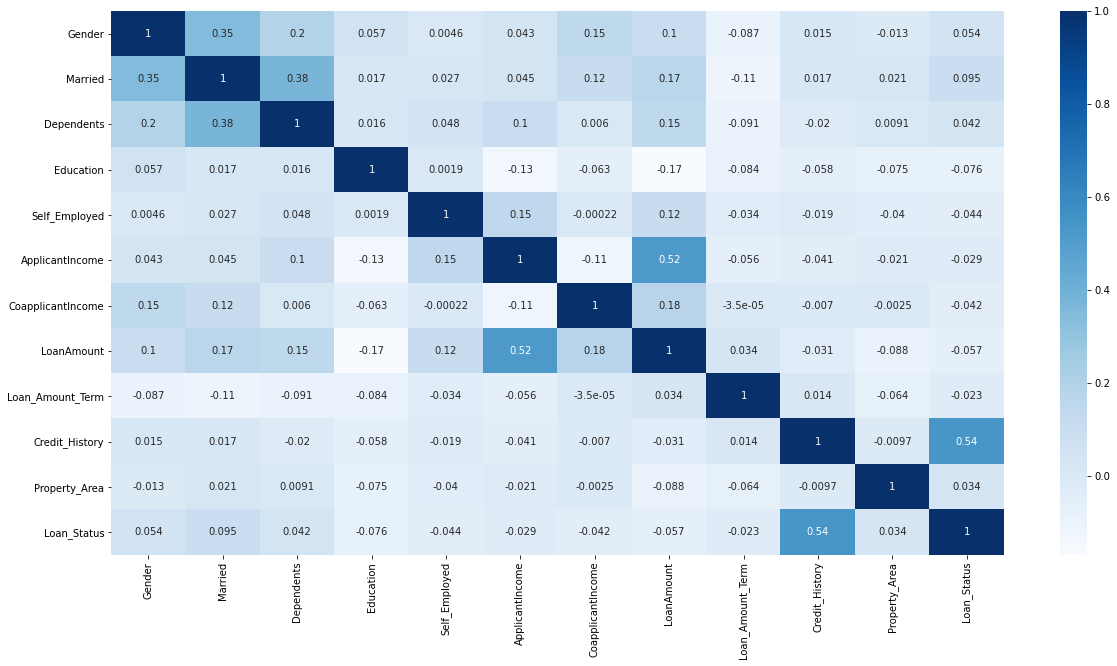

In [19]:
plt.figure(figsize = (20,10))
sns.heatmap(df_train.corr(), annot = True, cmap = 'Blues')

<AxesSubplot:>

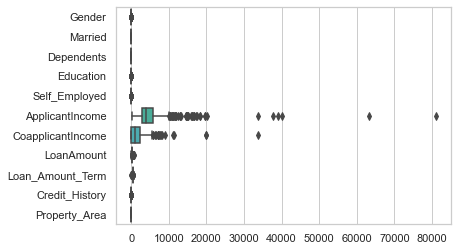

In [20]:
import seaborn as sns
sns.set_theme(style="whitegrid")
X_data = df_train.drop(['Loan_Status'],axis = 1)
sns.boxplot(data = X_data, orient="h")

In [21]:
df_train.shape

(517, 12)

In [22]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                  0.0
Married                 1.0
Dependents              2.0
Education               0.0
Self_Employed           0.0
ApplicantIncome      2880.0
CoapplicantIncome    2250.0
LoanAmount             65.0
Loan_Amount_Term        0.0
Credit_History          0.0
Property_Area           2.0
Loan_Status             1.0
dtype: float64


In [23]:
df_train = df_train[~((df_train < (Q1 - 1.5 * IQR)) |(df_train > (Q3 + 1.5 * IQR))).any(axis=1)]
df_train.shape

(189, 12)

In [24]:
X = df_train.drop(['Loan_Status'], axis =1)
#X = df_train[['Credit_History']]
y = df_train['Loan_Status']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [26]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_train = pca.fit_transform(X_train)

X_test = pca.transform(X_test)
variance = pca.explained_variance_
variance

array([1.89480422, 1.44541421, 1.12679689, 0.79627565, 0.47992473,
       0.30258582])

In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [30]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [31]:
logreg.score(X_test, y_test)

0.8947368421052632

In [32]:
logreg.score(X_train, y_train)

0.8484848484848485